In [1]:
import render
import rooms.dataset
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
torch.set_default_dtype(torch.float32)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device  = "cpu"

/home/gzanin/.local/lib/python3.11/site-packages/torch/cuda/__init__.py:118: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


In [3]:
D_0 = rooms.dataset.dataLoader("classroomBase")

In [4]:
L_0 = render.get_listener(source_xyz=D_0.speaker_xyz, listener_xyz = D_0.xyzs[0], surfaces=D_0.all_surfaces, 
                                                speed_of_sound=D_0.speed_of_sound,
                                                parallel_surface_pairs=D_0.parallel_surface_pairs,
                                                max_order=D_0.max_order, max_axial_order=D_0.max_axial_order )

Considered Paths:	59049
Total Considered Paths, after Axial:	59079
Valid Paths:	851


In [5]:
R_0 = render.Renderer(n_surfaces=len(D_0.all_surfaces))

In [6]:
# Utilizza più GPU se disponibili
if torch.cuda.device_count() > 1:
    print(f"Using {torch.cuda.device_count()} GPUs")
    R_0 = nn.DataParallel(R_0).module

In [7]:
pt_file = torch.load('./models/classroomBase/weights.pt', map_location=device)
R_0.energy_vector = nn.Parameter(pt_file['model_state_dict']['energy_vector'])
R_0.source_response = nn.Parameter(pt_file['model_state_dict']['source_response'])
R_0.directivity_sphere = nn.Parameter(pt_file['model_state_dict']['directivity_sphere'])
R_0.decay = nn.Parameter(pt_file['model_state_dict']['decay'])
R_0.RIR_residual = nn.Parameter(pt_file['model_state_dict']['RIR_residual'])
R_0.spline_values = nn.Parameter(pt_file['model_state_dict']['spline_values'])

R_0.bp_ord_cut_freqs.to(device)

Parameter containing:
tensor([  70.,  400.,  800., 1000., 1300., 2000.], requires_grad=True)

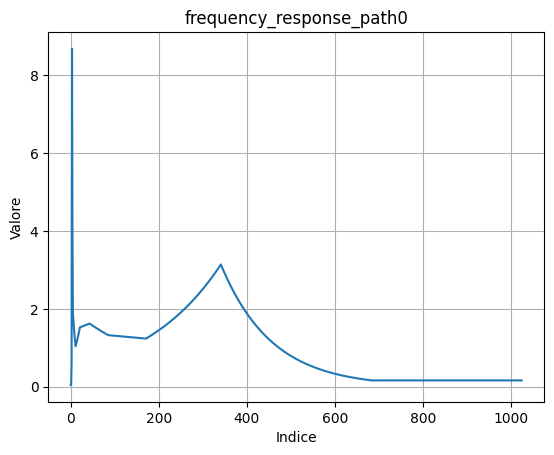

time to initializie freq resp =  0.20891094207763672


/home/gzanin/Desktop/hearinganythinganywhere/render.py:624: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at ../aten/src/ATen/native/Copy.cpp:300.)
  downsampled_new_freq_resp[i] = new_freq_resp[index]


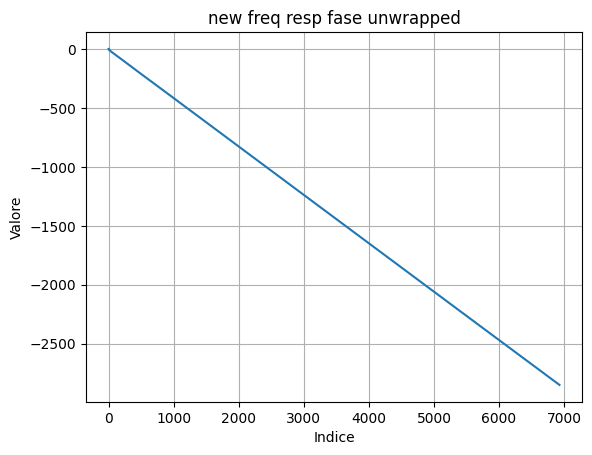

time to introduce delays =  1.7570180892944336
time to compute az and ele and set up for the beampatterns:  0.0007243156433105469
time to apply beampattern directional attenuation:  137.49084568023682
upsampked response:  tensor([-0.0097+0.j, -0.0097+0.j, -0.0097+0.j,  ..., -0.0065+0.j, -0.0065+0.j,
        -0.0065+0.j], grad_fn=<SumBackward1>)


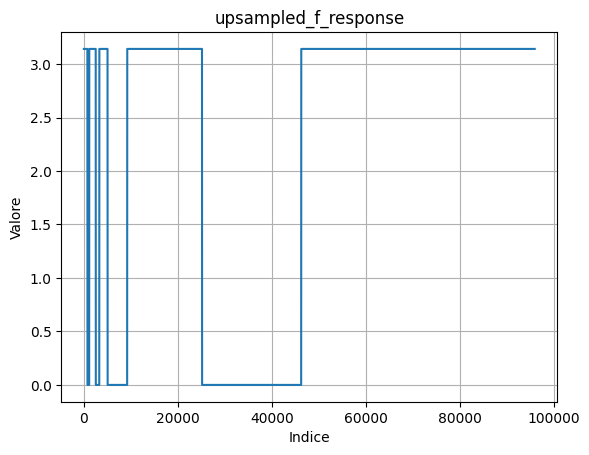

upsampked response:  tensor([-0.0097+0.j, -0.0097+0.j, -0.0097+0.j,  ..., -0.0177+0.j, -0.0177+0.j,
        -0.0177+0.j], grad_fn=<SumBackward1>)


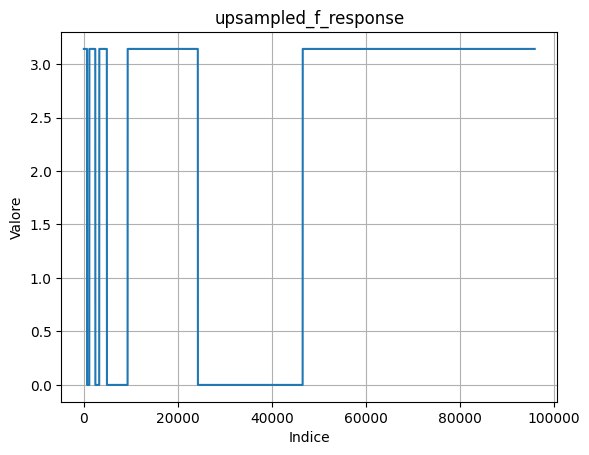

upsampked response:  tensor([-0.0097+0.j, -0.0097+0.j, -0.0097+0.j,  ..., -0.0028+0.j, -0.0028+0.j,
        -0.0028+0.j], grad_fn=<SumBackward1>)


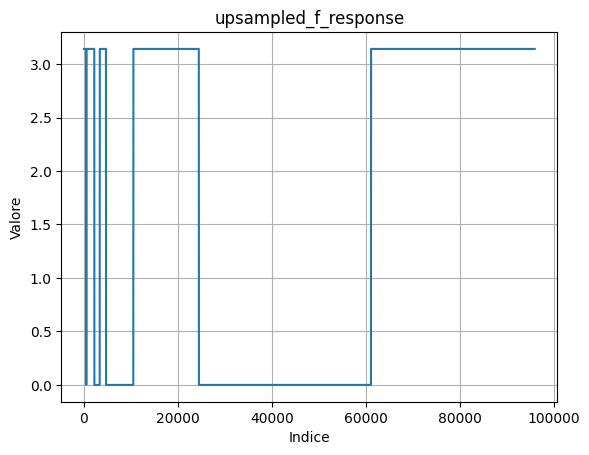

upsampked response:  tensor([-0.0097+0.j, -0.0097+0.j, -0.0097+0.j,  ..., -0.0030+0.j, -0.0030+0.j,
        -0.0030+0.j], grad_fn=<SumBackward1>)


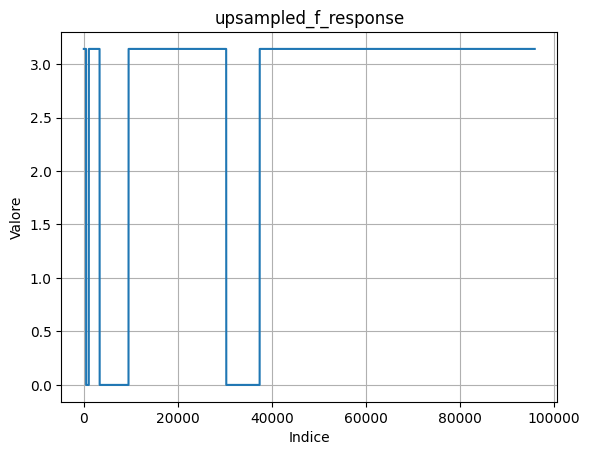

upsampked response:  tensor([-0.0097+0.j, -0.0097+0.j, -0.0097+0.j,  ..., -0.0033+0.j, -0.0033+0.j,
        -0.0033+0.j], grad_fn=<SumBackward1>)


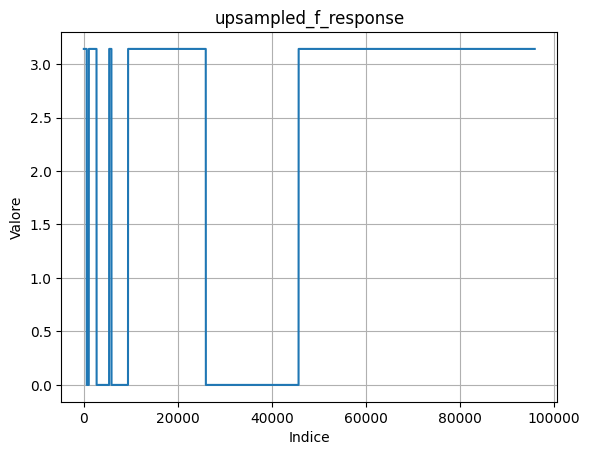

upsampked response:  tensor([-0.0097+0.j, -0.0097+0.j, -0.0097+0.j,  ..., -0.0005+0.j, -0.0005+0.j,
        -0.0005+0.j], grad_fn=<SumBackward1>)


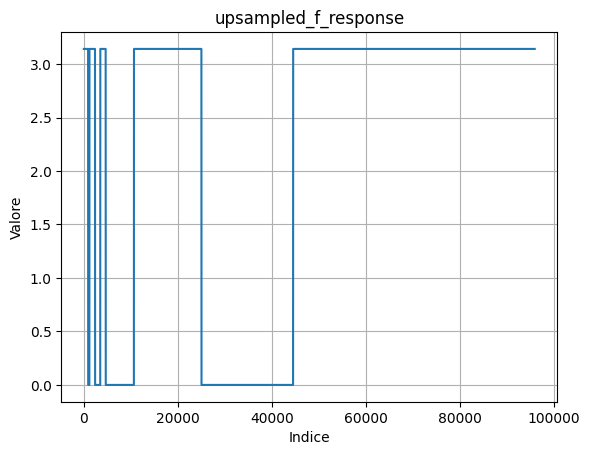

upsampked response:  tensor([-0.0097+0.j, -0.0097+0.j, -0.0097+0.j,  ..., -0.0048+0.j, -0.0048+0.j,
        -0.0048+0.j], grad_fn=<SumBackward1>)


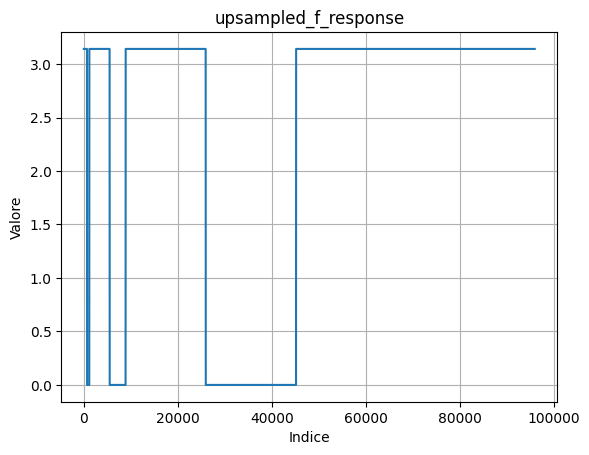

upsampked response:  tensor([-0.0097+0.j, -0.0097+0.j, -0.0097+0.j,  ..., -0.0310+0.j, -0.0310+0.j,
        -0.0310+0.j], grad_fn=<SumBackward1>)


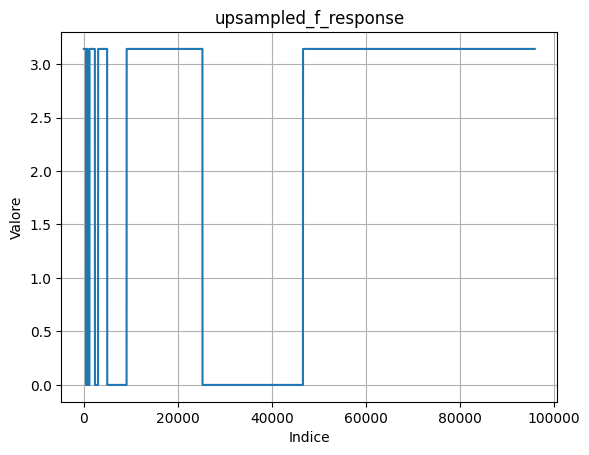

upsampked response:  tensor([-0.0097+0.j, -0.0097+0.j, -0.0097+0.j,  ..., -0.0102+0.j, -0.0102+0.j,
        -0.0102+0.j], grad_fn=<SumBackward1>)


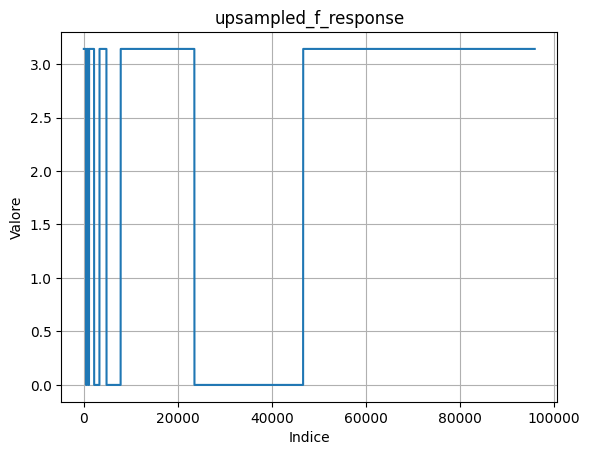

upsampked response:  tensor([-0.0097+0.j, -0.0097+0.j, -0.0097+0.j,  ..., -0.0060+0.j, -0.0060+0.j,
        -0.0060+0.j], grad_fn=<SumBackward1>)


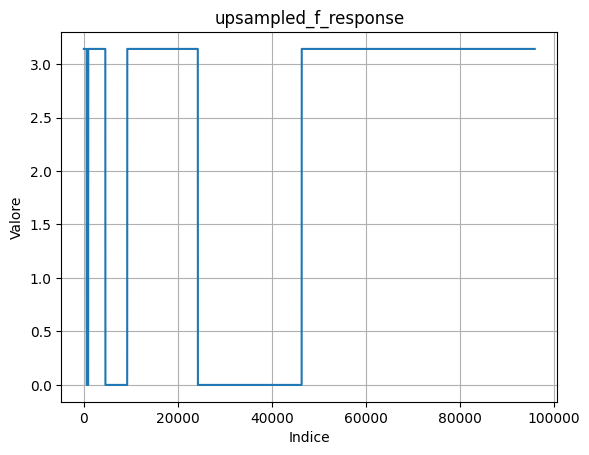

upsampked response:  tensor([-0.0097+0.j, -0.0097+0.j, -0.0097+0.j,  ...,  0.0017+0.j,  0.0017+0.j,
         0.0017+0.j], grad_fn=<SumBackward1>)


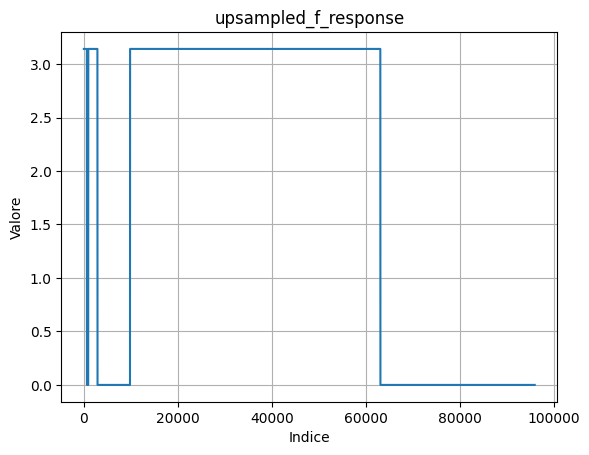

upsampked response:  tensor([-0.0097+0.j, -0.0097+0.j, -0.0097+0.j,  ..., -0.0050+0.j, -0.0050+0.j,
        -0.0050+0.j], grad_fn=<SumBackward1>)


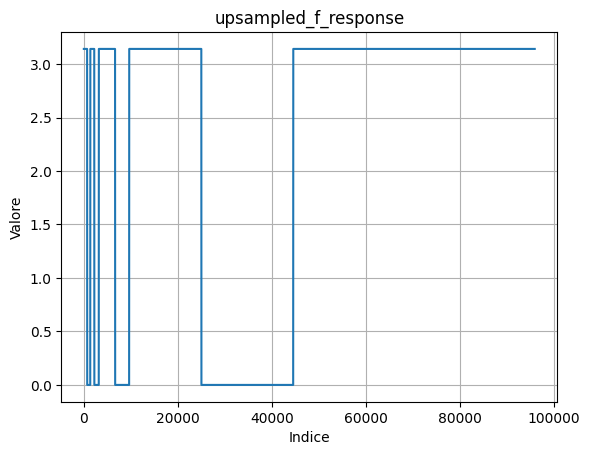

upsampked response:  tensor([-0.0097+0.j, -0.0097+0.j, -0.0097+0.j,  ..., -0.0120+0.j, -0.0120+0.j,
        -0.0120+0.j], grad_fn=<SumBackward1>)


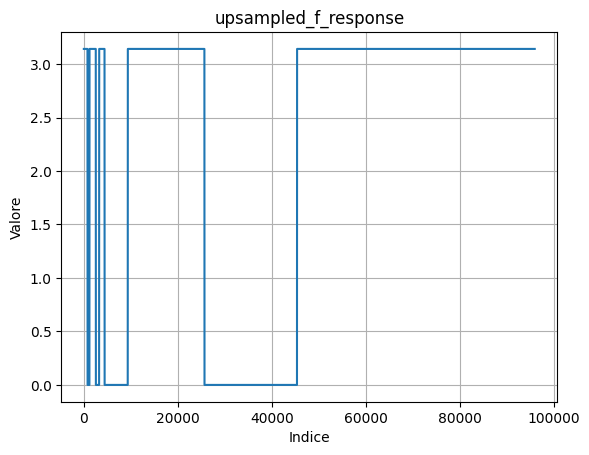

upsampked response:  tensor([-0.0097+0.j, -0.0097+0.j, -0.0097+0.j,  ..., -0.0032+0.j, -0.0032+0.j,
        -0.0032+0.j], grad_fn=<SumBackward1>)


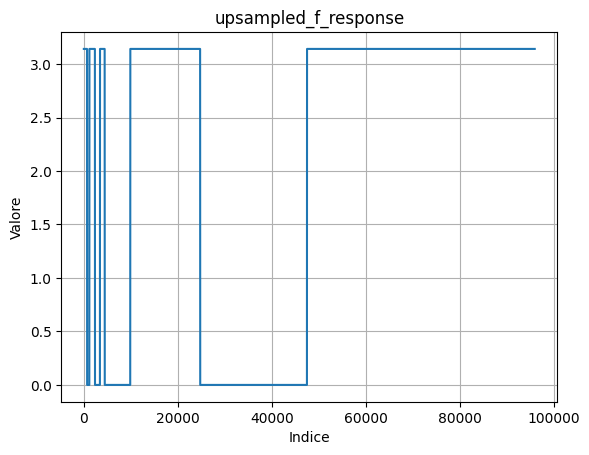

time to pad, anti-transform, convolve with source ir, apply decay:  1.2988383769989014


[{'angle': [0, -90.0],
  'f_response': tensor([-0.0097+0.j, -0.0034+0.j, -0.2122+0.j, -0.1574+0.j, -0.0070+0.j, -0.0028+0.j,
           0.0186+0.j, -0.0407+0.j, -0.0178+0.j,  0.0118+0.j, -0.0207+0.j,  0.0109+0.j,
           0.0207+0.j, -0.0334+0.j, -0.0332+0.j, -0.0242+0.j,  0.0601+0.j, -0.0073+0.j,
          -0.0065+0.j], grad_fn=<CopySlices>),
  't_response': tensor([-2.0010e-04,  9.3721e-05, -1.7629e-03,  ...,  4.9885e-07,
           4.5558e-07,  4.7935e-07], grad_fn=<AddBackward0>)},
 {'angle': [0.0, -30.0],
  'f_response': tensor([-0.0097+0.j, -0.0034+0.j, -0.2124+0.j, -0.4399+0.j, -0.0690+0.j,  0.0199+0.j,
           0.0412+0.j, -0.0739+0.j, -0.0349+0.j,  0.0359+0.j, -0.0661+0.j,  0.0512+0.j,
           0.0573+0.j, -0.0819+0.j, -0.0812+0.j, -0.0396+0.j,  0.1639+0.j, -0.0159+0.j,
          -0.0177+0.j], grad_fn=<CopySlices>),
  't_response': tensor([ 1.8220e-04,  9.6067e-04, -1.3418e-03,  ...,  4.9885e-07,
           4.5558e-07,  4.7935e-07], grad_fn=<AddBackward0>)},
 {'angle': [

In [8]:
resp = R_0.render_RIR_learned_beampattern(L_0)
resp

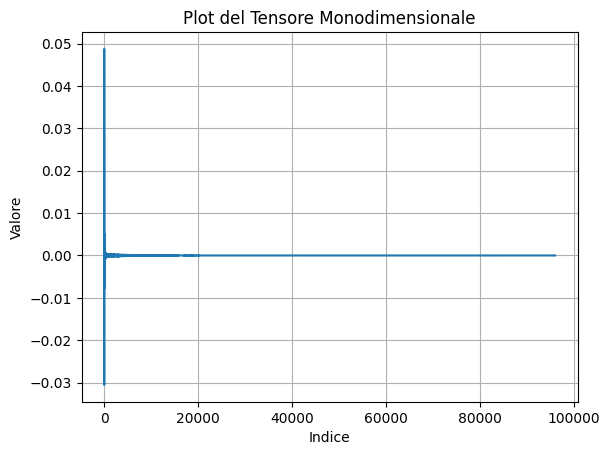

In [9]:
import torch
import matplotlib.pyplot as plt

# Step 3: Fare il plot del tensore
plt.plot(resp[1]['t_response'].detach().cpu())
plt.title("Plot del Tensore Monodimensionale")
plt.xlabel("Indice")
plt.ylabel("Valore")
plt.grid(True)
plt.show()

In [10]:
resp0 = R_0.render_RIR(L_0)
resp0

tensor([-2.6540e-10,  3.6859e-06,  5.5096e-06,  ...,  6.9838e-06,
         6.3781e-06,  6.7109e-06], grad_fn=<AddBackward0>)

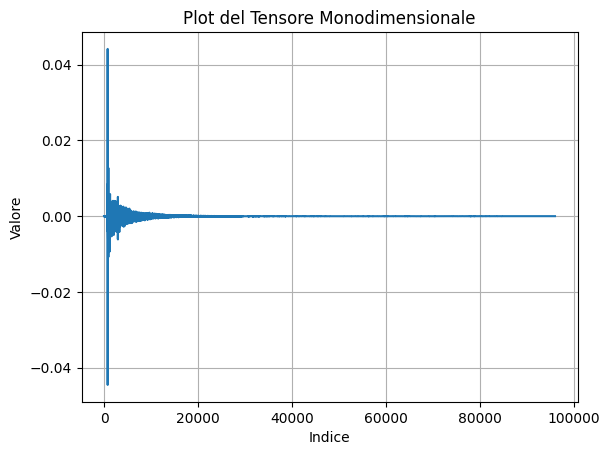

In [11]:
import torch
import matplotlib.pyplot as plt

# Step 3: Fare il plot del tensore
plt.plot(resp0.detach().cpu())
plt.title("Plot del Tensore Monodimensionale")
plt.xlabel("Indice")
plt.ylabel("Valore")
plt.grid(True)
plt.show()